Importing Required Libraries 

In [28]:
import pandas as pd
import numpy as np
from google.colab import drive
import re
import nltk
nltk.download('punkt')
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('wordnet')
#nltk.download()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Downloading the csv file 

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=14kJqcWkvGZkEI1OL8b9tUwBv-Zble5Bx'
fluff, id = link.split('=')
# Download the csv file.
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('8*8.csv')

In [0]:
data = pd.read_csv('8*8.csv')

In [33]:
data.head()

,Subject,Description
0,Not all calls are being forwarded to my email ...,Many calls are coming through on e-mail but t...
1,password,\rI have a new employee and need to change th...
2,Rate for additional lines,Can you adjust the two additional lines we hav...


In [34]:
data.iloc[1]

Subject                                                 password
Description     \rI have a new employee and need to change th...
Name: 1, dtype: object

In [35]:
data.shape

(3, 2)

In [36]:
data['Description'][0]


"Many calls are coming through on e-mail  but then suddenly there will be 3-4 calls that don't get forwarded.  Some calls show a message is left but there is no sound (I've tried rebooting my phone multiple times - doesn't help).  If I check your ap there is a red circle with an exclamation inside when I push the play button.  Today I had the sound on an email but no sound on the voicemail in your app.  It's very erratic and I'm losing calls."

In [37]:
data['Subject'][0]

'Not all calls are being forwarded to my email plus sound issues.'

In [0]:
import re
data['Description'] = data['Description'].map(lambda x: re.sub('[,\.!?]', '', x))
data['Subject'] = data['Subject'].map(lambda x: re.sub('[,\.!?]', '', x))

Checking the workcount in every sentence

In [40]:
data['word_count'] = data['Description'].apply(lambda x: len(str(x).split(" ")))
data[['Description','word_count']].head()

,Description,word_count
0,Many calls are coming through on e-mail but t...,90
1,\rI have a new employee and need to change th...,49
2,Can you adjust the two additional lines we hav...,31


In [41]:
data['word_count1'] = data['Subject'].apply(lambda x: len(str(x).split(" ")))
data[['Subject','word_count1']].head()

,Subject,word_count1
0,Not all calls are being forwarded to my email ...,12
1,password,1
2,Rate for additional lines,4


In [42]:
data.word_count1.describe()

count     3.000000
mean      5.666667
std       5.686241
min       1.000000
25%       2.500000
50%       4.000000
75%       8.000000
max      12.000000
Name: word_count1, dtype: float64

Identifying the common words

In [43]:
import pandas
freq = pandas.Series(' '.join(data['Description']).split()).value_counts()[:20]
freq = pandas.Series(' '.join(data['Subject']).split()).value_counts()[:20]
freq

are           1
being         1
plus          1
additional    1
Rate          1
lines         1
forwarded     1
email         1
my            1
password      1
all           1
sound         1
to            1
calls         1
Not           1
issues        1
for           1
dtype: int64

Identifying the uncommon words

In [44]:
freq1 =  pandas.Series(' '.join(data
         ['Description']).split()).value_counts()[-20:]
freq1

push         1
new          1
than         1
help)        1
circle       1
If           1
123          1
rebooting    1
for          1
am           1
(I've        1
we           1
erratic      1
I'm          1
reach        1
work         1
Please       1
It's         1
Can          1
app          1
dtype: int64

In [45]:
freq1 =  pandas.Series(' '.join(data
         ['Subject']).split()).value_counts()[-20:]

freq1

are           1
being         1
plus          1
additional    1
Rate          1
lines         1
forwarded     1
email         1
my            1
password      1
all           1
sound         1
to            1
calls         1
Not           1
issues        1
for           1
dtype: int64

Text Preprocessing

In [46]:
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [0]:
#Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
#Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [48]:
data['Description'][0]

"Many calls are coming through on e-mail  but then suddenly there will be 3-4 calls that don't get forwarded  Some calls show a message is left but there is no sound (I've tried rebooting my phone multiple times - doesn't help)  If I check your ap there is a red circle with an exclamation inside when I push the play button  Today I had the sound on an email but no sound on the voicemail in your app  It's very erratic and I'm losing calls"

Removing punctuations,tags, special characters and digits, Converting text to lower and convert to list from string

In [0]:
corpus = []
for i in range(3):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['Description'][i])
    text1 = re.sub('[^a-zA-Z]', ' ', data['Subject'][i])
    #Convert to lowercase
    text = text.lower()
    text1 = text1.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text1=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text1)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    text1=re.sub("(\\d|\\W)+"," ",text1)
    
    ##Convert to list from string
    text = text.split()
    text1 = text1.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    text1 = [lem.lemmatize(word) for word in text1 if not word in  
            stop_words] 
    text1 = " ".join(text1)
    corpus.append(text)
    corpus.append(text1)

View corpus item

In [50]:
corpus[4]

'adjust additional line account billed discounted rate line please reach xxxxxxxxxx'

Plotting word cloud

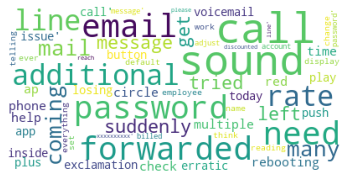

In [51]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

Here I have used CountVectorizer. feature_extraction.text module creates a document-term matrix. and specified to include only those words that appear less than 80% and at least in 2 document. I have cleaned the text by removing stop words as stop words do not contribute to topic modeling.









Later created a vector of word counts and did the conversion of CountVectoriser to tokenise the text and build a vocabulary of known words.
created a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

In [0]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

parameters passed into the function:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).This is to ensure that we only have words relevant to the context and not commonly used words.
max_features — determines the number of columns in the matrix.
n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.

In [54]:
X

<6x187 sparse matrix of type '<class 'numpy.int64'>'
	with 197 stored elements in Compressed Sparse Row format>

In [55]:
list(cv.vocabulary_.keys())[:20]

['many',
 'call',
 'coming',
 'mail',
 'suddenly',
 'get',
 'forwarded',
 'message',
 'left',
 'sound',
 'tried',
 'rebooting',
 'phone',
 'multiple',
 'time',
 'help',
 'check',
 'ap',
 'red',
 'circle']

Visualize top N uni-grams, bi-grams & tri-grams
We can use the CountVectoriser to visualise the top 20 unigrams, bi-grams and tri-grams.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, 'call'),
 Text(0, 0, 'sound'),
 Text(0, 0, 'password'),
 Text(0, 0, 'line'),
 Text(0, 0, 'forwarded'),
 Text(0, 0, 'message'),
 Text(0, 0, 'email'),
 Text(0, 0, 'need'),
 Text(0, 0, 'additional'),
 Text(0, 0, 'rate'),
 Text(0, 0, 'many'),
 Text(0, 0, 'coming'),
 Text(0, 0, 'mail'),
 Text(0, 0, 'suddenly'),
 Text(0, 0, 'get'),
 Text(0, 0, 'left'),
 Text(0, 0, 'tried'),
 Text(0, 0, 'rebooting'),
 Text(0, 0, 'phone'),
 Text(0, 0, 'multiple')]

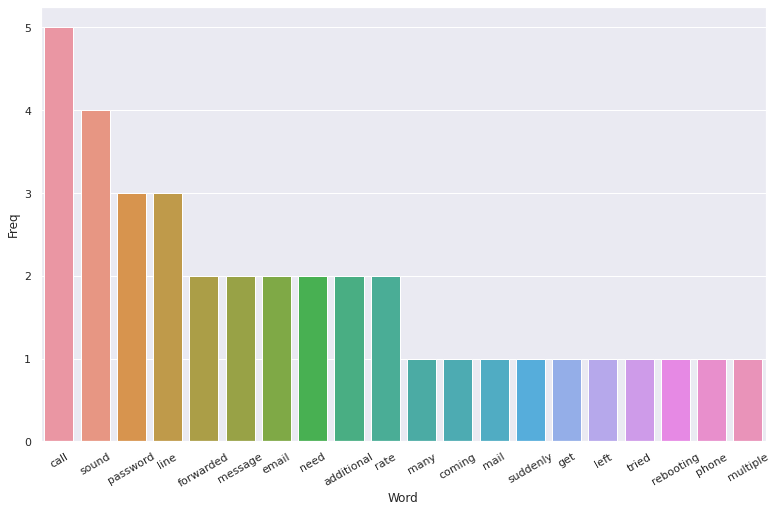

In [56]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

            Bi-gram  Freq
0   additional line     2
1         many call     1
2       call coming     1
3       coming mail     1
4     mail suddenly     1
5     suddenly call     1
6          call get     1
7     get forwarded     1
8    forwarded call     1
9      call message     1
10     message left     1
11       left sound     1
12      sound tried     1
13  tried rebooting     1
14  rebooting phone     1
15   phone multiple     1
16    multiple time     1
17        time help     1
18       help check     1
19         check ap     1


[Text(0, 0, 'additional line'),
 Text(0, 0, 'many call'),
 Text(0, 0, 'call coming'),
 Text(0, 0, 'coming mail'),
 Text(0, 0, 'mail suddenly'),
 Text(0, 0, 'suddenly call'),
 Text(0, 0, 'call get'),
 Text(0, 0, 'get forwarded'),
 Text(0, 0, 'forwarded call'),
 Text(0, 0, 'call message'),
 Text(0, 0, 'message left'),
 Text(0, 0, 'left sound'),
 Text(0, 0, 'sound tried'),
 Text(0, 0, 'tried rebooting'),
 Text(0, 0, 'rebooting phone'),
 Text(0, 0, 'phone multiple'),
 Text(0, 0, 'multiple time'),
 Text(0, 0, 'time help'),
 Text(0, 0, 'help check'),
 Text(0, 0, 'check ap')]

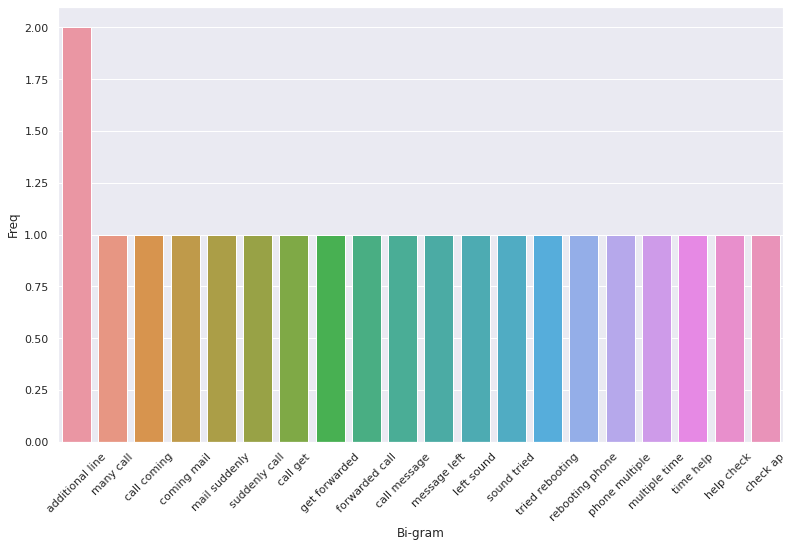

In [57]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                    Tri-gram  Freq
0           many call coming     1
1           call coming mail     1
2       coming mail suddenly     1
3         mail suddenly call     1
4          suddenly call get     1
5         call get forwarded     1
6         get forwarded call     1
7     forwarded call message     1
8          call message left     1
9         message left sound     1
10          left sound tried     1
11     sound tried rebooting     1
12     tried rebooting phone     1
13  rebooting phone multiple     1
14       phone multiple time     1
15        multiple time help     1
16           time help check     1
17             help check ap     1
18              check ap red     1
19             ap red circle     1


[Text(0, 0, 'many call coming'),
 Text(0, 0, 'call coming mail'),
 Text(0, 0, 'coming mail suddenly'),
 Text(0, 0, 'mail suddenly call'),
 Text(0, 0, 'suddenly call get'),
 Text(0, 0, 'call get forwarded'),
 Text(0, 0, 'get forwarded call'),
 Text(0, 0, 'forwarded call message'),
 Text(0, 0, 'call message left'),
 Text(0, 0, 'message left sound'),
 Text(0, 0, 'left sound tried'),
 Text(0, 0, 'sound tried rebooting'),
 Text(0, 0, 'tried rebooting phone'),
 Text(0, 0, 'rebooting phone multiple'),
 Text(0, 0, 'phone multiple time'),
 Text(0, 0, 'multiple time help'),
 Text(0, 0, 'time help check'),
 Text(0, 0, 'help check ap'),
 Text(0, 0, 'check ap red'),
 Text(0, 0, 'ap red circle')]

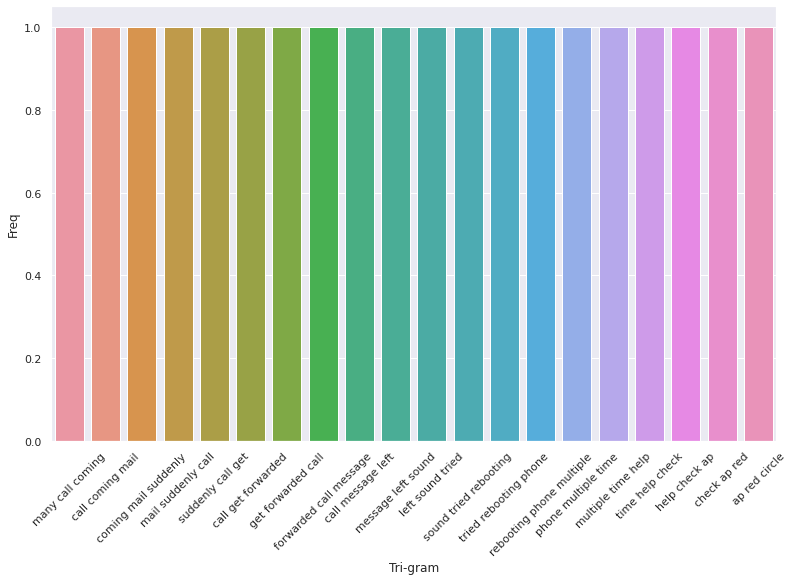

In [58]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

Then Converting to a matrix of integers
The next step of refining the word counts is using the TF-IDF vectoriser. The deficiency of a mere word count obtained from the countVectoriser is that, large counts of certain common words may dilute the impact of more context specific words in the corpus. 

This is overcome by the TF-IDF vectoriser which penalizes words that appear several times across the document. TF-IDF are word frequency scores that highlight words that are more important to the context rather than those that appear frequently across documents.
TF-IDF consists of 2 components:
TF — term frequency
IDF — Inverse document frequency

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[5]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [60]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nDescription:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Description:
rate additional line

Keywords:
rate additional line 0.462
rate additional 0.462
rate 0.379
line 0.379
additional line 0.379


Topic Modeliing - Classification of subject and description, into things like product defects, poor services, call quality issues, price issue, etc

In [61]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [62]:
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=10000, min_df=1,
                ngram_range=(1, 3), preprocessor=None,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'also', 'am', 'an', 'and', 'any',
                            'are', 'aren', "aren't", 'as', 'at', 'be',
                            'because', 'been', 'before', 'being', 'below',
                            'between', 'both', 'but', 'by', 'can', 'couldn', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [81]:
import random

for i in range(96):
    random_id = random.randint(0,len(cv.get_feature_names()))
    print(cv.get_feature_names()[random_id])

left
many call coming
button today
erratic losing call
telling need
plus
mail
tried rebooting phone
call message
default work think
message left
play
check ap red
need change name
voicemail app erratic
left sound tried
telling need password
suddenly call get
left sound tried
call
message left sound
password default work
circle
suddenly call get
rebooting
button
help check ap
forwarded email plus
tried rebooting
play button today
change name
time help check
coming mail
need password default
push
rebooting
message left
message left
voicemail
need change
email plus
account billed
billed discounted
button today
app erratic losing
losing call
call message left
everything reading
line please reach
erratic losing call
inside push play
voicemail
everything
think ever
push play
telling need
time help
line please
multiple time
email sound
button today
inside push play
forwarded call
need
app erratic losing
losing
telling need password
call message
button today
reading
default work think
rate lin

In [0]:
first_topic = LDA.components_[0]

In [0]:
top_topic_words = first_topic.argsort()[-10:]

In [84]:
top_topic_words

array([157,  25,  52,  53,  74,  75,  85, 129,  51,  71])

In [85]:
for i in top_topic_words:
    print(cv.get_feature_names()[i])

sound issue
call forwarded email
email plus
email plus sound
forwarded email
forwarded email plus
issue
plus
email
forwarded


In [86]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['sound issue', 'call forwarded email', 'email plus', 'email plus sound', 'forwarded email', 'forwarded email plus', 'issue', 'plus', 'email', 'forwarded']


Top 10 words for topic #1:
['sound', 'forwarded', 'email', 'line', 'additional line', 'additional', 'rate', 'rate additional', 'rate additional line', 'password']


Top 10 words for topic #2:
['sound', 'forwarded', 'email', 'line', 'additional line', 'additional', 'rate', 'rate additional', 'rate additional line', 'password']


Top 10 words for topic #3:
['multiple time', 'multiple', 'message left sound', 'call get', 'message left', 'circle exclamation', 'erratic losing call', 'message', 'sound', 'call']


Top 10 words for topic #4:
['ever set password', 'reading telling need', 'reading telling', 'ever', 'additional line', 'additional', 'rate', 'need', 'password', 'line']




In [87]:
topic_values = LDA.transform(X)
topic_values.shape

(6, 5)

In [88]:
data['Topic'] = pd.Series(topic_values.argmax(axis=1))
data['Topic']


#product defects, poor services, call quality issues, price issue

0    3
1    0
2    4
Name: Topic, dtype: int64

In [90]:
data['Topic']=data['Topic'].replace([0], 'product defects')
data['Topic']= data['Topic'].replace([3], 'poor services')
data['Topic']= data['Topic'].replace([4], 'Call Quality issue')
data['Topic']


0         poor services
1       product defects
2    Call Quality issue
Name: Topic, dtype: object

In [91]:
data.head()

,Subject,Description,word_count,word_count1,Topic
0,Not all calls are being forwarded to my email ...,Many calls are coming through on e-mail but t...,90,12,poor services
1,password,\rI have a new employee and need to change th...,49,1,product defects
2,Rate for additional lines,Can you adjust the two additional lines we hav...,31,4,Call Quality issue


We can see next to Subject and its description, what ticket is really about in Topic column.